<a href="https://colab.research.google.com/github/LidiiaMelnyk95/FSU_Jena_scripts/blob/main/SVM_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/linear_clusters_no_dupes_annotated.csv', sep = ';')
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
import pandas as pd
from sklearn.utils import resample

def oversample_minority_class(df, minority_class_label, majority_class_label, middle_class_label, random_state=42):
    # Separate the DataFrame into majority, minority, and middle classes
    df_majority_class = df[df['Classification'] == majority_class_label]
    df_minority_class = df[df['Classification'] == minority_class_label]
    df_middle_class = df[df['Classification'] == middle_class_label]

    # Get the count of each class
    class_counts = df['Classification'].value_counts()
    count_majority_class = class_counts.get(majority_class_label, 0)
    count_middle_class = class_counts.get(middle_class_label, 0)
    count_minority_class = class_counts.get(minority_class_label, 0)

    # Oversample the minority class using resample
    df_class_oversample = resample(df_minority_class, n_samples=count_majority_class, replace=True, random_state=random_state)
    df_mid_sample = resample(df_middle_class, n_samples=count_majority_class, replace=True, random_state=random_state)

    # Concatenate the balanced data
    df_balanced_os = pd.concat([df_class_oversample, df_majority_class, df_mid_sample], axis=0)

    return df_balanced_os

# Specify your DataFrame and class labels
df_balanced_os = oversample_minority_class(df, minority_class_label=3, majority_class_label=1, middle_class_label=2)


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_balanced_os, test_size=0.20)

In [ ]:
train_df.head()

,Unnamed: 0,title,Classification
126,1146,Selected status is not displayed in the dropdo...,2
192,118,✅ Task: Hand-Over Documentation,3
196,156,"🐞 ""Summary for review was not found"" banner sh...",2
194,1167,Task: Mixpanel Improvement & Further Integration,3
137,1103,"Overlay is missing the divider at the bottom, ...",2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train_df['title'].astype(str))
test_vectors = vectorizer.transform(test_df['title'].astype(str))

In [ ]:
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time

# Assuming train_df and test_df are your DataFrames
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(sublinear_tf=True, use_idf=True)
train_vectors = vectorizer.fit_transform(train_df['title'].astype(str))
test_vectors = vectorizer.transform(test_df['title'].astype(str))

# Train SVM with linear kernel
classifier_linear = SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train_df['Classification'])
t1 = time.time()

# Predict and evaluate
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1 - t0
time_linear_predict = t2 - t1

# Output training and prediction times
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

# Output classification report
report = classification_report(test_df['Classification'], prediction_linear, output_dict=True)
class_labels = ['feature', 'fixes', 'maintenance']
for label in class_labels:
    print(f"{label}: {report[str(label)]['precision']:.4f} precision, {report[str(label)]['recall']:.4f} recall, {report[str(label)]['f1-score']:.4f} f1-score")

print('feature: ', report['1'])
print('fixes: ', report['2'])
print('maintenance: ', report['3'])

In [ ]:
linear = svm.SVC(kernel='linear', C=3, decision_function_shape='ovo').fit(train_vectors, train_df['Classification'])
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(train_vectors, train_df['Classification'])
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(train_vectors, train_df['Classification'])
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(train_vectors, train_df['Classification'])

In [ ]:
prediction_rbf = rbf.predict(test_vectors)
report = classification_report(test_df['Classification'], prediction_linear, output_dict=True)
print('feature: ', report['1'])
print('fixes: ', report['2'])
print('maintenance: ', report['3'])

feature:  {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.923076923076923, 'support': 35}
fixes:  {'precision': 0.9142857142857143, 'recall': 1.0, 'f1-score': 0.955223880597015, 'support': 32}
maintenance:  {'precision': 0.9411764705882353, 'recall': 1.0, 'f1-score': 0.9696969696969697, 'support': 32}


In [ ]:
prediction_poly = poly.predict(test_vectors)
report = classification_report(test_df['Classification'], prediction_linear, output_dict=True)
print('feature: ', report['1'])
print('fixes: ', report['2'])
print('maintenance: ', report['3'])

feature:  {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.923076923076923, 'support': 35}
fixes:  {'precision': 0.9142857142857143, 'recall': 1.0, 'f1-score': 0.955223880597015, 'support': 32}
maintenance:  {'precision': 0.9411764705882353, 'recall': 1.0, 'f1-score': 0.9696969696969697, 'support': 32}


In [ ]:
prediction_sig = sig.predict(test_vectors)
report = classification_report(test_df['Classification'], prediction_linear, output_dict=True)
print('feature: ', report['1'])
print('fixes: ', report['2'])
print('maintenance: ', report['3'])

feature:  {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.923076923076923, 'support': 35}
fixes:  {'precision': 0.9142857142857143, 'recall': 1.0, 'f1-score': 0.955223880597015, 'support': 32}
maintenance:  {'precision': 0.9411764705882353, 'recall': 1.0, 'f1-score': 0.9696969696969697, 'support': 32}


In [ ]:
prediction_lin = linear.predict(test_vectors)
report = classification_report(test_df['Classification'], prediction_linear, output_dict=True)
print('feature: ', report['1'])
print('fixes: ', report['2'])
print('maintenance: ', report['3'])

feature:  {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.923076923076923, 'support': 35}
fixes:  {'precision': 0.9142857142857143, 'recall': 1.0, 'f1-score': 0.955223880597015, 'support': 32}
maintenance:  {'precision': 0.9411764705882353, 'recall': 1.0, 'f1-score': 0.9696969696969697, 'support': 32}


In [ ]:
test_prediction_vector =  vectorizer.transform(['delete some updates from our database',
                                                    'fix some bugs',
                                                    'add something beautiful',
                                                    'implement new technology',
                                                    'introduce changes to API',
                                                    'get some new updates',
                                                'improve the performance',
                                                'deal with the error'])
linear.predict(test_prediction_vector)

array([1, 2, 1, 1, 3, 1, 3, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
list_of_scores = []
def accuracy_score_list(y_pred):
  list_of_scores.append(accuracy_score(test_df['Classification'], y_pred))
  return (accuracy_score(test_df['Classification'], y_pred))
accuracy_data = [prediction_lin, prediction_sig, prediction_poly, prediction_rbf]
for i in accuracy_data:
  accuracy_score_list(i)


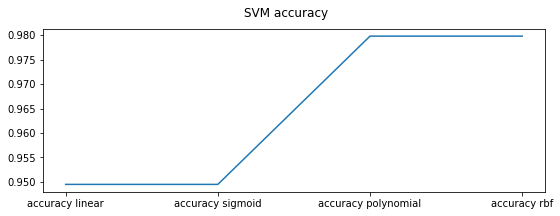

In [ ]:
import matplotlib.pyplot as plt
names = ['accuracy linear', 'accuracy sigmoid', 'accuracy polynomial', 'accuracy rbf']
values = list_of_scores
plt.figure(figsize=(9, 3))

plt.plot(names, values)
plt.suptitle('SVM accuracy')
plt.show()

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install -q -U "tensorflow-text==2.9.*"
import tensorflow_text as text


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.01, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(3, activation='softmax', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
df['title'] = df['title'].apply(lambda x: x.lower())
df_balanced_os['title'] = df_balanced_os['title'].apply(lambda x: x.lower())

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(df['title'].values,df['Classification'].values.astype(np.int32))
encode = OneHotEncoder()

training_labels = encode.fit_transform(y_train.reshape(-1,1))
testing_labels = encode.transform(y_test.reshape(-1,1))
training_labels = training_labels.toarray()
testing_labels = testing_labels.toarray()

In [ ]:
training_labels

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, training_labels, epochs=2, batch_size = 6)

Epoch 1/2
30/30 [==============================] - 81s 3s/step - loss: 0.8529 - accuracy: 0.6610
Epoch 2/2
30/30 [==============================] - 79s 3s/step - loss: 0.8216 - accuracy: 0.6610


In [ ]:
accr = model.evaluate(X_test,testing_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2/2 [==============================] - 27s 12s/step - loss: 0.6002 - accuracy: 0.7627
Test set
  Loss: 0.600
  Accuracy: 0.763


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_balanced_os['title'].values,df_balanced_os['Classification'].values)

training_labels_1 = encode.fit_transform(y_train_1.reshape(-1,1))
testing_labels_1 = encode.transform(y_test_1.reshape(-1,1))
training_labels_1 = training_labels_1.toarray()
testing_labels_1 = testing_labels_1.toarray()
model_1 = tf.keras.Model(inputs=[text_input], outputs = [l])
model_1.compile(optimizer='adam', loss= tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model_1.fit(X_train_1, training_labels_1, epochs=2, batch_size = 6)

Epoch 1/2
62/62 [==============================] - 178s 3s/step - loss: 1.1147 - accuracy: 0.4097
Epoch 2/2
62/62 [==============================] - 167s 3s/step - loss: 1.0700 - accuracy: 0.4825


In [ ]:
accr_1 = model_1.evaluate(X_test_1,testing_labels_1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 55s 13s/step - loss: 1.3505 - accuracy: 0.2903
Test set
  Loss: 0.600
  Accuracy: 0.763
